In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Часть 1

***Задание:***
Используя предоставленные данные о клиентах банка и их продуктах, проведите сбор и предварительную обработку данных.

1. Проведите первичную очистку данных (уберите дублирующиеся строки, приведите форматы полей к единому виду, заполните пропущенные значения при необходимости).

Рассмотрим первый датасет, в котором представлена информация о клиентах банка.

In [7]:
df = pd.read_csv('Клиенты.csv', sep = '|')
df.head()

,%IDКлиента,Клиенты_Возраст,Клиенты_Доход,Клиенты_Номер,Клиенты_Пол,Клиенты_Регион
0,1,NaN,NaN,NaN,NaN,Санкт-Петербург
1,2,NaN,NaN,NaN,NaN,Санкт-Петербург
2,3,NaN,NaN,NaN,NaN,Санкт-Петербург
3,4,NaN,NaN,NaN,NaN,Санкт-Петербург
4,5,NaN,NaN,NaN,NaN,Санкт-Петербург


Изменим колонку "ID клиента" в более удобный фрормат.

In [10]:
df.rename(columns={'%IDКлиента': 'ID_Клиента'}, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64702 entries, 0 to 64701
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Клиента       64702 non-null  int64  
 1   Клиенты_Возраст  64122 non-null  object 
 2   Клиенты_Доход    22572 non-null  float64
 3   Клиенты_Номер    64436 non-null  float64
 4   Клиенты_Пол      63254 non-null  object 
 5   Клиенты_Регион   64702 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ MB


In [14]:
df.shape

(64702, 6)

Приведем колонку "Клиенты_Возраст" к корректному числовому формату.

In [17]:
df['Клиенты_Возраст'] = pd.to_numeric(df['Клиенты_Возраст'], errors = 'coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64702 entries, 0 to 64701
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Клиента       64702 non-null  int64  
 1   Клиенты_Возраст  64117 non-null  float64
 2   Клиенты_Доход    22572 non-null  float64
 3   Клиенты_Номер    64436 non-null  float64
 4   Клиенты_Пол      63254 non-null  object 
 5   Клиенты_Регион   64702 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 3.0+ MB


In [21]:
df.describe()

,ID_Клиента,Клиенты_Возраст,Клиенты_Доход,Клиенты_Номер
count,64702.000000,64117.000000,2.257200e+04,64436.000000
mean,32351.500000,41.837531,7.745432e+03,32046.794478
std,18678.002896,15.592803,7.523010e+04,18506.324322
min,1.000000,2.000000,0.000000e+00,1.000000
25%,16176.250000,30.000000,0.000000e+00,16025.750000
50%,32351.500000,39.000000,0.000000e+00,32046.500000
75%,48526.750000,52.000000,6.393250e+03,48071.250000
max,64702.000000,125.000000,9.647998e+06,64101.000000


In [23]:
df.isna().sum()

ID_Клиента             0
Клиенты_Возраст      585
Клиенты_Доход      42130
Клиенты_Номер        266
Клиенты_Пол         1448
Клиенты_Регион         0
dtype: int64

Чтобы убрать пропуски в столбце "Клиенты_Возраст", было решено заполнить их медианным значением по регионам, чтобы минимизировать влияение выбросов и учесть региональные различия возрастного состава клиентов.

In [26]:
df.groupby('Клиенты_Регион')['Клиенты_Возраст'].median().reset_index()

,Клиенты_Регион,Клиенты_Возраст
0,Калининград,43.0
1,Краснодар,37.5
2,Ленинградская область,48.0
3,Москва,42.0
4,Новосибирск,43.0
5,Санкт-Петербург,39.0


In [28]:
df['Клиенты_Возраст'] = df['Клиенты_Возраст'].fillna(df.groupby('Клиенты_Регион')['Клиенты_Возраст'].transform('median'))

Столбец "Клиенты_Номер" содержит практически уникальные технические номера, которые не несут аналитической значимости. Поэтому пропуски в нем не заполнялись и колонка была оставлена без изменений.

In [31]:
df['Клиенты_Номер'].nunique()

64101

In [33]:
df['Клиенты_Номер'].value_counts()

Клиенты_Номер
17085.0    4
58189.0    3
34995.0    3
16781.0    3
4627.0     3
          ..
21436.0    1
21437.0    1
21438.0    1
21439.0    1
64101.0    1
Name: count, Length: 64101, dtype: int64

В столбце "Клиенты_Доход" превалирует значение 0, который, скорей всего, используется в выгрузке как индикатор отсутствия данных, а не реальная финансовая величина. Поэтому пропуски в этом столбце были заполнены нулями, что соответсвует логике исходных данных и не искажает их структуру.

In [36]:
df['Клиенты_Доход'].value_counts()

Клиенты_Доход
0.0        14271
868.0        153
229.0        146
977.0         60
3861.0        56
           ...  
33134.0        1
25082.0        1
12014.0        1
29604.0        1
5084.0         1
Name: count, Length: 6314, dtype: int64

In [38]:
df['Клиенты_Доход'] = df['Клиенты_Доход'].fillna(0)

Значения в столбце "Клиенты_Пол" являются категориальными, поэтому, чтобы сохранить структуру данных, было решено заполнить пропуски на категорию «Не указан».

In [41]:
df['Клиенты_Пол'] = df['Клиенты_Пол'].fillna('Не указан')

In [43]:
df.isna().sum()

ID_Клиента           0
Клиенты_Возраст      0
Клиенты_Доход        0
Клиенты_Номер      266
Клиенты_Пол          0
Клиенты_Регион       0
dtype: int64

В датасете не было выявлено дубликатов.

In [46]:
df.duplicated().sum()

0

Перейдем ко второму датасету, описывающий продукты банка и активность по ним.

In [50]:
dk = pd.read_csv('Продукты.csv')
dk.head()

,%IDКлиента,%МесяцГод,Активность,ПродуктНаименование,ПродуктТип
0,268,45626,1,Карта Шанс,Карта
1,268,45657,1,Текущий счет,Расчетный счет
2,268,45716,1,Текущий счет,Расчетный счет
3,268,45626,1,Текущий счет,Расчетный счет
4,268,45688,1,Текущий счет,Расчетный счет


Переименуем колонки в более читаемый формат.

In [53]:
dk.rename(columns={'%IDКлиента': 'ID_Клиента', 
                   '%МесяцГод': 'Дата', 
                   'ПродуктНаименование': 'Продукт_Наименование',
                   'ПродуктТип': 'Продукт_Тип'}, inplace = True)

In [55]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559090 entries, 0 to 559089
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ID_Клиента            559090 non-null  int64 
 1   Дата                  559090 non-null  int64 
 2   Активность            559090 non-null  int64 
 3   Продукт_Наименование  559090 non-null  object
 4   Продукт_Тип           559090 non-null  object
dtypes: int64(3), object(2)
memory usage: 21.3+ MB


In [57]:
dk.shape

(559090, 5)

Преобразуем значения в столбце "Дата" в формат даты.

In [60]:
dk['Дата'] = pd.to_datetime(dk['Дата'], unit = 'D', origin = '1899-12-30')

In [62]:
dk.describe()

,ID_Клиента,Дата,Активность
count,559090.000000,559090,559090.000000
mean,32497.562689,2025-01-30 05:23:36.780840704,0.454224
min,268.000000,2024-11-30 00:00:00,0.000000
25%,16421.000000,2024-12-31 00:00:00,0.000000
50%,32520.000000,2025-01-31 00:00:00,0.000000
75%,48588.000000,2025-02-28 00:00:00,1.000000
max,64702.000000,2025-03-31 00:00:00,1.000000
std,18546.985126,NaN,0.497901


В таблице не было выявлено пропусков.

In [65]:
dk.isna().sum()

ID_Клиента              0
Дата                    0
Активность              0
Продукт_Наименование    0
Продукт_Тип             0
dtype: int64

После проверки данных было выявлено 5362 дубликатов. Поскольку такие записи могут исказить результаты анализа, они были полностью удалены. 

In [68]:
dk.duplicated().sum()

5362

In [70]:
dk = dk.drop_duplicates()

In [72]:
dk.duplicated().sum()

0

Также была проведена дополнительная проверка категориальных столбцов, где было выявлено дублирование одного и того же продукта, записанного в двух вариантах: «Карта Кошелёк» и «Карта Кошелек ». Это различие связано только с орфографией и не несет смыслового отличия. Чтобы избежать раздробления статистики при дальнейшем анализе, значения были приведены к единому формату.

In [75]:
dk['Продукт_Наименование'].value_counts()

Продукт_Наименование
Текущий счет              186687
Зарплатный проект         133669
Карта Скоробей             82525
Детская карта              23719
Карта Шанс                 21926
Платеж вендору             17795
Накопительный счет         17173
Карта Замочек              12843
Кредитная карта            11746
Вклад                       9169
Текущий счет (пособия)      8555
Пенсионная карта            5942
Потребительский кредит      4138
Карта Космос                3956
Ипотека                     3776
Карта Koшелек               3172
Карта Кошелёк               3006
Бизнес карта                2073
Удалая карта                1553
Карта Ключик                 171
Карта Сим-Сим                126
Ключик                         8
Name: count, dtype: int64

In [77]:
dk['Продукт_Тип'].value_counts()

Продукт_Тип
Расчетный счет             195242
Карта                      161020
Зарплатный проект          133669
Платежи вендорам            17795
Накопительный счет          17173
Кредитные карты             11746
Вклад                        9169
Потребительские кредиты      4138
Ипотека                      3776
Name: count, dtype: int64

In [79]:
dk['Продукт_Наименование'] = (dk['Продукт_Наименование'].replace({'Карта Koшелек ': 'Карта Koшелек', 'Карта Кошелёк': 'Карта Koшелек'}))

2. Объедините таблицы по необходимым критериям.

Данные из двух таблиц были объединены по ключевому полю ID_Клиента. Использовалось внутреннее соединение, что позволило сохранить только те записи, которые присутствуют в обеих таблицах.

In [83]:
df_merged = df.merge(
    dk,
    on = 'ID_Клиента',
    how = 'inner'
)

In [85]:
df_merged.head()

,ID_Клиента,Клиенты_Возраст,Клиенты_Доход,Клиенты_Номер,Клиенты_Пол,Клиенты_Регион,Дата,Активность,Продукт_Наименование,Продукт_Тип
0,268,23.0,0.0,2.0,М,Новосибирск,2024-11-30,1,Карта Шанс,Карта
1,268,23.0,0.0,2.0,М,Новосибирск,2024-12-31,1,Текущий счет,Расчетный счет
2,268,23.0,0.0,2.0,М,Новосибирск,2025-02-28,1,Текущий счет,Расчетный счет
3,268,23.0,0.0,2.0,М,Новосибирск,2024-11-30,1,Текущий счет,Расчетный счет
4,268,23.0,0.0,2.0,М,Новосибирск,2025-01-31,1,Текущий счет,Расчетный счет


3. Рассчитайте количество уникальных активных продуктов по всем клиентам, и количество владеющих этими продуктами клиентов в ноябре 2024 года. Каким образом эти два показателя изменились по отношению к последнему периоду?

Для упрощения дальнейшего анализа из даты были выделены отдельные компоненты - месяц и год.

In [89]:
df_merged['Месяц'] = df_merged['Дата'].dt.month
df_merged['Год'] = df_merged['Дата'].dt.year

In [91]:
df_merged.head()

,ID_Клиента,Клиенты_Возраст,Клиенты_Доход,Клиенты_Номер,Клиенты_Пол,Клиенты_Регион,Дата,Активность,Продукт_Наименование,Продукт_Тип,Месяц,Год
0,268,23.0,0.0,2.0,М,Новосибирск,2024-11-30,1,Карта Шанс,Карта,11,2024
1,268,23.0,0.0,2.0,М,Новосибирск,2024-12-31,1,Текущий счет,Расчетный счет,12,2024
2,268,23.0,0.0,2.0,М,Новосибирск,2025-02-28,1,Текущий счет,Расчетный счет,2,2025
3,268,23.0,0.0,2.0,М,Новосибирск,2024-11-30,1,Текущий счет,Расчетный счет,11,2024
4,268,23.0,0.0,2.0,М,Новосибирск,2025-01-31,1,Текущий счет,Расчетный счет,1,2025


Посчитаем активность за ноябрь 2024.

In [94]:
nov_2024 = df_merged[(df_merged['Активность'] == 1) & (df_merged['Месяц'] == 11) & (df_merged['Год'] == 2024)]

In [96]:
nov_products = nov_2024['Продукт_Наименование'].nunique()
nov_clients = nov_2024['ID_Клиента'].nunique()

print(nov_products, nov_clients)

20 22848


Найдем в датасете последний период и рассчитаем по нему активность.

In [99]:
df_merged['Дата'].max()

Timestamp('2025-03-31 00:00:00')

In [101]:
mar_2025 = df_merged[(df_merged['Активность'] == 1) & (df_merged['Месяц'] == 3) & (df_merged['Год'] == 2025)]

In [103]:
mar_products = mar_2025['Продукт_Наименование'].nunique()
mar_clients = mar_2025['ID_Клиента'].nunique()

print(mar_products, mar_clients)

21 22980


Рассчитаем разницу между двумя периодами в абсолютном и процентном соотношениях.

In [106]:
delta_products = mar_products - nov_products
delta_clients = mar_clients - nov_clients

print(f'Изменение продукта: {delta_products}\nИзменение клиентов: {delta_clients}')

Изменение продукта: 1
Изменение клиентов: 132


In [108]:
def perc_change(mar_2025, nov_2024):
    change = ((mar_2025-nov_2024)/nov_2024)*100
    return round(change, 2)

perc_change_products = perc_change(mar_products, nov_products)
perc_change_clients = perc_change(mar_clients, nov_clients)

print(f'Изменение продукта: {perc_change_products}%\nИзменение клиентов: {perc_change_clients}%')

Изменение продукта: 5.0%
Изменение клиентов: 0.58%


In [110]:
colors = sns.color_palette('Set1')
colors

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

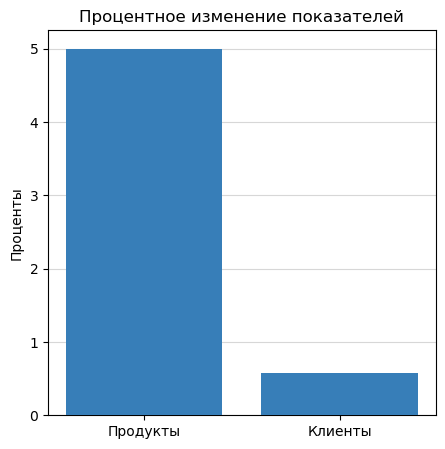

In [114]:
labels = ['Продукты', 'Клиенты']
perc_change = [perc_change_products, perc_change_clients]

plt.figure(figsize=(5,5))
plt.bar(labels, perc_change, zorder = 3, color = colors[1])
plt.title('Процентное изменение показателей')
plt.ylabel('Проценты')
plt.grid(axis = 'y', alpha = 0.5, zorder = 0)
plt.show()

4. Определите самые популярные продукты и продукты, активность которых росла в течение последних трех месяцев.

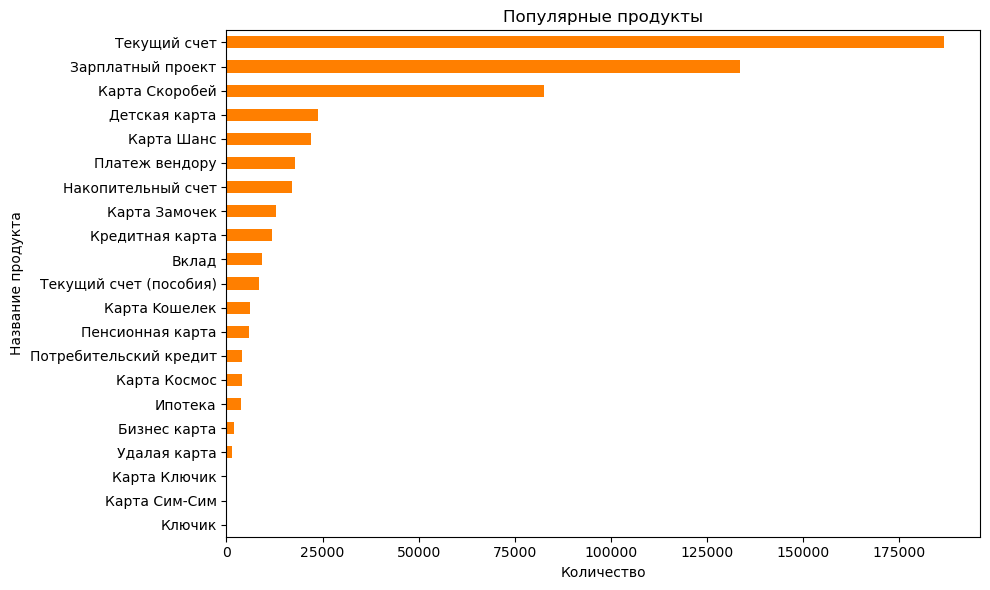

In [117]:
popular_products = df_merged['Продукт_Наименование'].value_counts()

plt.figure(figsize=(10,6))
popular_products.plot(kind = 'barh', color = colors[4])
plt.title('Популярные продукты')
plt.xlabel('Количество')
plt.ylabel('Название продукта')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

Самыми популярными продуктами являются "Текущий счет", "Зарплатный проект" и "Карта Скоробей" - они значительно опережают все остальные категории. Большинство продуктов имеет существенно меньший объем клиентов, что говорит о высокой концентрации спроса в нескольких ключевых направлениях.

Для анализа продуктов, активность которых росла последние 3 месяца, были отобраны записи только с активными клиентами за определенный период. Затем для каждого продукта было рассчитано количество уникальных активных клиентов по месяцам.

In [123]:
months = [1, 2, 3]

In [125]:
df_active = df_merged[(df_merged['Активность'] == 1) & (df_merged['Месяц'].isin(months))]

In [127]:
activity = (
    df_active.groupby(['Продукт_Наименование', 'Месяц'])['ID_Клиента'].nunique().reset_index(name='Активные_клиенты')
)
activity

,Продукт_Наименование,Месяц,Активные_клиенты
0,Бизнес карта,1,106
1,Бизнес карта,2,110
2,Бизнес карта,3,110
3,Вклад,1,1638
4,Вклад,2,1669
...,...,...,...
57,Текущий счет (пособия),2,1811
58,Текущий счет (пособия),3,2010
59,Удалая карта,1,150
60,Удалая карта,2,162


Далее для каждого продукта была проверена монотонность роста активности за последние три месяца и сформирован список на основе результатов.

In [130]:
def is_growing(activity):
    vals = activity['Активные_клиенты'].values

    return vals[0] < vals[1] < vals[2]

grow = activity.groupby('Продукт_Наименование').apply(is_growing)

growing_products = grow[grow].index.tolist()

growing_products

C:\Users\User\AppData\Local\Temp\ipykernel_2892\26354823.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grow = activity.groupby('Продукт_Наименование').apply(is_growing)


['Вклад',
 'Зарплатный проект',
 'Ипотека',
 'Карта Koшелек',
 'Накопительный счет',
 'Платеж вендору',
 'Потребительский кредит',
 'Текущий счет (пособия)']

## Часть 2

***Задание:***
*На основе собранной информации о клиентах проанализируйте поведение пользователей банковских приложений и онлайн-сервисов.*

Загрузим необходимые датасеты для анализа и проведем первичную обработку.

In [135]:
payments = pd.read_csv('Платежи.csv')

In [137]:
payments.head()

,AMOUNT,ВалютаRUB,ID,PROCESSEDAT,STATUS,TIME,USER_ID
0,"100,00",да,1,01.01.2025 14:32:24,DONE,01.01.2025 14:32:21,10928
1,"200000,00",да,2,01.01.2025 13:18:01,DONE,01.01.2025 13:18:00,2338
2,"260000,00",да,3,01.01.2025 8:09:14,DONE,01.01.2025 8:09:13,4051
3,"1434,16",да,4,01.01.2025 9:16:07,DONE,01.01.2025 9:16:06,852
4,"525,00",да,5,01.01.2025 9:16:57,DONE,01.01.2025 9:16:45,4078


In [139]:
payments.rename(columns = {
    'AMOUNT': 'Сумма',
    'ВалютаRUB': 'Валюта_RUB',
    'PROCESSEDAT': 'Дата_обработки',
    'STATUS': 'Статус',
    'TIME': 'Дата_перевода',
    'USER_ID': 'ID_Клиента'
}, inplace = True)

In [141]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56578 entries, 0 to 56577
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Сумма           56578 non-null  object
 1   Валюта_RUB      56578 non-null  object
 2   ID              56578 non-null  int64 
 3   Дата_обработки  54972 non-null  object
 4   Статус          56578 non-null  object
 5   Дата_перевода   56578 non-null  object
 6   ID_Клиента      56578 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.0+ MB


In [143]:
payments['Сумма'] = payments['Сумма'].str.replace(',', '.').astype(float)

In [145]:
payments['Дата_обработки'] = pd.to_datetime(payments['Дата_обработки'], dayfirst = True)
payments['Дата_перевода'] = pd.to_datetime(payments['Дата_перевода'], dayfirst = True)

In [147]:
payments.isna().sum()

Сумма                0
Валюта_RUB           0
ID                   0
Дата_обработки    1606
Статус               0
Дата_перевода        0
ID_Клиента           0
dtype: int64

In [149]:
miss = payments[payments['Дата_обработки'].isna()]
miss.head(5)

,Сумма,Валюта_RUB,ID,Дата_обработки,Статус,Дата_перевода,ID_Клиента
24,750.00,да,25,NaT,WAITING_FOR_SIGNATURES,2025-01-01 14:28:25,4329
69,600.00,да,70,NaT,WAITING_FOR_SIGNATURES,2025-01-01 01:26:19,1941
84,55.68,да,85,NaT,WAITING_FOR_SIGNATURES,2025-01-01 06:38:57,3398
163,700.00,да,164,NaT,WAITING_FOR_SIGNATURES,2025-01-01 10:02:01,265
201,600.00,да,202,NaT,WAITING_FOR_SIGNATURES,2025-01-01 01:27:00,1941


In [151]:
payments['Статус'].value_counts()

Статус
DONE                      54279
WAITING_FOR_SIGNATURES     1302
FAILED                      698
READY_TO_SUBMIT             174
DRAFT                       125
Name: count, dtype: int64

Так как значения в столбце "Дата_обработки" отсутсвуют из-за невыполненого статуса, пропуски было решено оставить без изменений.

In [154]:
payments.duplicated().sum()

0

In [157]:
entry = pd.read_csv('Входы_ИБ_МП.csv', sep = ';')

In [159]:
entry.head()

,TIME_ENTRY,ИБ,МП,%IDКлиента,USER_ID
0,09.12.2024 21:17:45,1,0,39652,1
1,09.12.2024 0:52:18,1,0,39652,1
2,10.01.2025 1:49:41,1,0,39652,1
3,02.12.2024 0:24:12,1,0,39652,1
4,09.12.2024 21:28:00,1,0,39652,1


In [161]:
entry.rename(columns={
    'TIME_ENTRY': 'Дата_входа',
    '%IDКлиента': 'ID_Клиента'
}, inplace = True)

In [163]:
entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596089 entries, 0 to 596088
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Дата_входа  596089 non-null  object
 1   ИБ          596089 non-null  int64 
 2   МП          596089 non-null  int64 
 3   ID_Клиента  596089 non-null  int64 
 4   USER_ID     596089 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 22.7+ MB


In [165]:
entry['Дата_входа'] = pd.to_datetime(entry['Дата_входа'], dayfirst = True)

In [166]:
entry.isna().sum()

Дата_входа    0
ИБ            0
МП            0
ID_Клиента    0
USER_ID       0
dtype: int64

In [169]:
entry.duplicated().sum()

35

In [171]:
entry = entry.drop_duplicates()

In [173]:
entry.duplicated().sum()

0

1. Определите ключевые метрики, характеризующие активность пользователей (например, частота входа в приложение, сумма переводов и др.).

Рассмотрим метрики сначал по онлайн-сервисам, а потом перейдем к данным о транзакциях.

In [177]:
entry.head()

,Дата_входа,ИБ,МП,ID_Клиента,USER_ID
0,2024-12-09 21:17:45,1,0,39652,1
1,2024-12-09 00:52:18,1,0,39652,1
2,2025-01-10 01:49:41,1,0,39652,1
3,2024-12-02 00:24:12,1,0,39652,1
4,2024-12-09 21:28:00,1,0,39652,1


In [179]:
entry['Дата'] = entry['Дата_входа'].dt.date
entry['Месяц'] = entry['Дата_входа'].dt.to_period('M')

In [197]:
DAU = entry.groupby('Дата')['ID_Клиента'].nunique()
DAU

Дата
2024-12-01    3905
2024-12-02    4243
2024-12-03    4119
2024-12-04    3868
2024-12-05    4001
              ... 
2025-01-27    4345
2025-01-28    4274
2025-01-29    4292
2025-01-30    4213
2025-01-31    4467
Name: ID_Клиента, Length: 62, dtype: int64

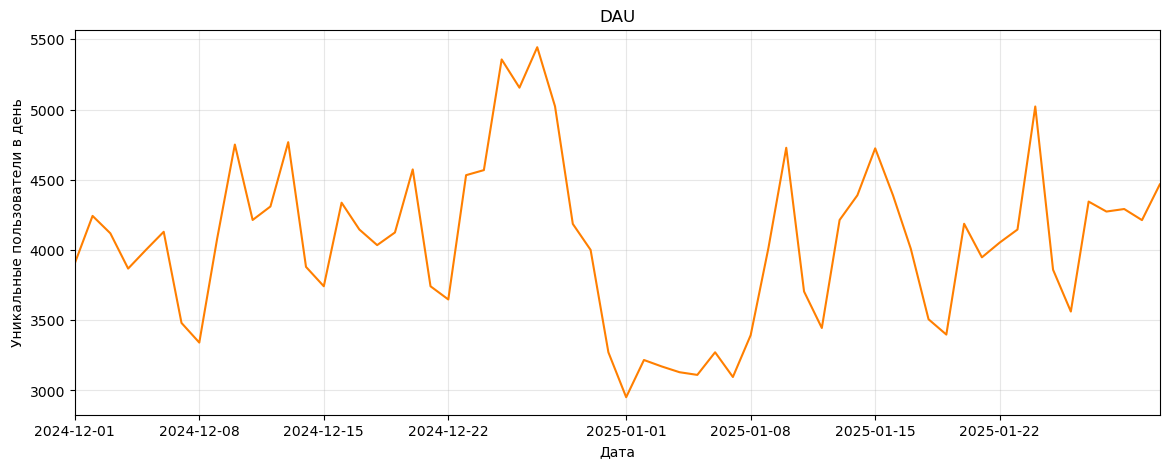

In [199]:
plt.figure(figsize=(14,5))
sns.lineplot(data=DAU, color = colors[4])
plt.xlim(DAU.index.min(), DAU.index.max())
plt.title('DAU')
plt.xlabel('Дата')
plt.ylabel('Уникальные пользователи в день')
plt.grid(alpha = 0.3)
plt.show()

Ежедневная активность пользователей колеблется в диапазоне примерно 3500-5000 человек в день. Наблюдается резкое падение в период новогодних праздников, после которого активность быстро восстанавливается.

In [202]:
MAU = entry.groupby('Месяц')['ID_Клиента'].nunique()
MAU

Месяц
2024-12    12998
2025-01    12918
Freq: M, Name: ID_Клиента, dtype: int64

In [204]:
stickiness = DAU.mean() / MAU.mean()
stickiness

0.31269510926118627

Примерно треть пользователей пользуются онлайн-сервисом ежедневно, демонстрируя умеренный уровень вовлеченности.

In [207]:
users_ib = entry[entry['ИБ'] == 1]['ID_Клиента'].nunique()
users_mp = entry[entry['МП'] == 1]['ID_Клиента'].nunique()
users_total = entry['ID_Клиента'].nunique()

share_ib = round(users_ib / users_total,2)
share_mp = round(users_mp / users_total, 2)

print(f'Количество пользователей интернет-банка: {users_ib}')
print(f'Количество пользователей мобильного приложения: {users_mp}')
print(f'Общее количество пользователей интернет-банка: {users_total}')
print(f'Доля пользователей интернет-банка: {share_ib}')
print(f'Доля пользователей мобильного приложения: {share_mp}')

Количество пользователей интернет-банка: 808
Количество пользователей мобильного приложения: 13862
Общее количество пользователей интернет-банка: 14238
Доля пользователей интернет-банка: 0.06
Доля пользователей мобильного приложения: 0.97


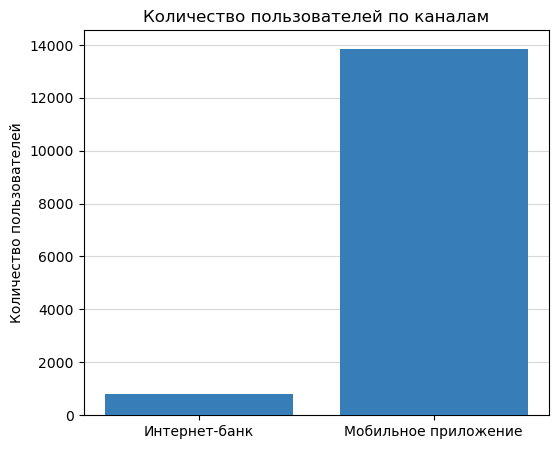

In [209]:
labels = ['Интернет-банк', 'Мобильное приложение']
count = [users_ib, users_mp]
plt.figure(figsize=(6,5))
plt.bar(labels, count, zorder = 3, color= colors[1])
plt.title('Количество пользователей по каналам')
plt.ylabel('Количество пользователей')
plt.grid(axis ='y', alpha=0.5, zorder = 0)
plt.show()

Почти все клиенты предпочитают мобильное приложение (97%), тогда как интернет-банком пользуются лишь около 6% клиентов, что указывает на явный сдвиг в сторону мобильных каналов.

In [212]:
ib = set(entry[entry['ИБ'] == 1]['ID_Клиента'])
mp = set(entry[entry['МП'] == 1]['ID_Клиента'])

only_ib = ib - mp
only_mp = mp - ib
both = ib & mp

print(f'Только ИБ: {len(only_ib)}')
print(f'Только МП: {len(only_mp)}')
print(f'Оба канала: {len(both)}')

Только ИБ: 376
Только МП: 13430
Оба канала: 432


C:\Users\User\AppData\Local\Temp\ipykernel_2892\3957564219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segments, y=counts, palette='Set1', zorder = 3)


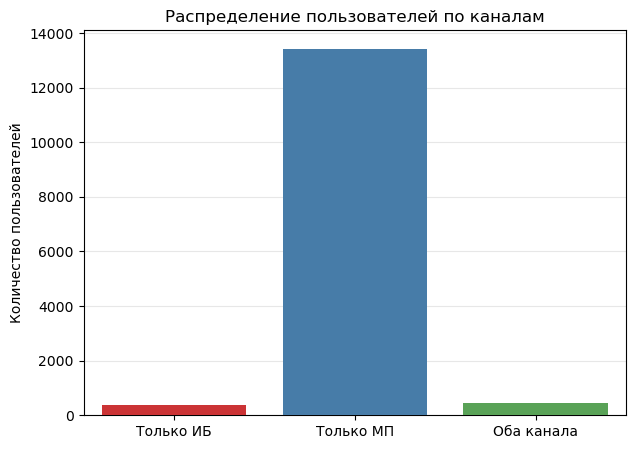

In [216]:
segments = ['Только ИБ', 'Только МП', 'Оба канала']
counts = [len(only_ib), len(only_mp), len(both)]

plt.figure(figsize=(7,5))
sns.barplot(x=segments, y=counts, palette='Set1', zorder = 3)
plt.title('Распределение пользователей по каналам')
plt.ylabel('Количество пользователей')
plt.grid(axis = 'y', alpha = 0.3, zorder = 0)
plt.show()

На графике видно, что большинство пользователей предпочитают пользоваться только мобильным приложением.

In [219]:
payments.head()

,Сумма,Валюта_RUB,ID,Дата_обработки,Статус,Дата_перевода,ID_Клиента
0,100.00,да,1,2025-01-01 14:32:24,DONE,2025-01-01 14:32:21,10928
1,200000.00,да,2,2025-01-01 13:18:01,DONE,2025-01-01 13:18:00,2338
2,260000.00,да,3,2025-01-01 08:09:14,DONE,2025-01-01 08:09:13,4051
3,1434.16,да,4,2025-01-01 09:16:07,DONE,2025-01-01 09:16:06,852
4,525.00,да,5,2025-01-01 09:16:57,DONE,2025-01-01 09:16:45,4078


In [221]:
payments['Дата'] = payments['Дата_перевода'].dt.date
payments['Месяц'] = payments['Дата_перевода'].dt.to_period('M')

In [223]:
tr_day = payments.groupby('Дата')['ID'].count().mean()
print(f'Среднее количество транзакций в день: {round(tr_day, 2)}')

Среднее количество транзакций в день: 912.55


In [225]:
vol_day = payments.groupby('Дата')['Сумма'].sum().mean()
print(f'Средний дневной объем переводов: {round(vol_day, 2)}')

Средний дневной объем переводов: 26847417.02


In [227]:
avg_check = payments['Сумма'].mean()
print(f'Средняя сумма одной транзакции: {round(avg_check, 2)}')

Средняя сумма одной транзакции: 29420.27


In [231]:
tr_user = payments.groupby('ID_Клиента')['ID'].count().mean()
print(f'Среднее количество транзакций на одного пользователя: {round(tr_user, 2)}')

Среднее количество транзакций на одного пользователя: 8.25


Пользователи совершают около 900 транзакций в день со средним дневным оборотом почти 27 млн. руб., а средний чек около 30 тыс. руб. указывает на преобладание средних и крупных переводов.

2. Постройте графики, показывающие распределение активности по дням недели и времени суток.

In [235]:
entry['День_недели'] = entry['Дата_входа'].dt.day_name(locale='ru_RU')
entry['Час'] = entry['Дата_входа'].dt.hour

In [237]:
entry.head()

,Дата_входа,ИБ,МП,ID_Клиента,USER_ID,Дата,Месяц,День_недели,Час
0,2024-12-09 21:17:45,1,0,39652,1,2024-12-09,2024-12,Понедельник,21
1,2024-12-09 00:52:18,1,0,39652,1,2024-12-09,2024-12,Понедельник,0
2,2025-01-10 01:49:41,1,0,39652,1,2025-01-10,2025-01,Пятница,1
3,2024-12-02 00:24:12,1,0,39652,1,2024-12-02,2024-12,Понедельник,0
4,2024-12-09 21:28:00,1,0,39652,1,2024-12-09,2024-12,Понедельник,21


C:\Users\User\AppData\Local\Temp\ipykernel_2892\46038892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=entry,


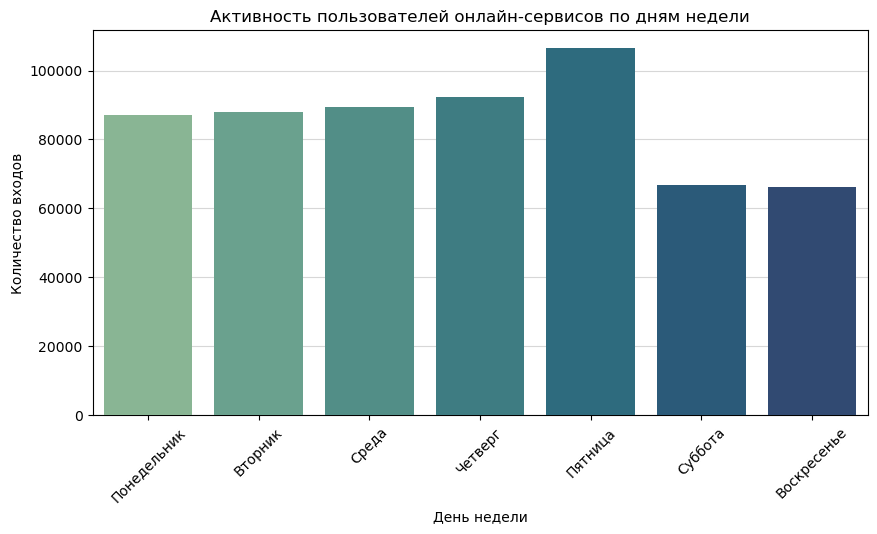

In [283]:
plt.figure(figsize=(10,5))
sns.countplot(data=entry,
             x = 'День_недели',
             order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
             palette = 'crest',
             zorder = 3)

plt.title('Активность пользователей онлайн-сервисов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество входов')
plt.xticks(rotation=45)
plt.grid(axis ='y', alpha=0.5, zorder = 0)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2892\2914550433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=entry, x='Час', palette= 'crest', zorder = 3)


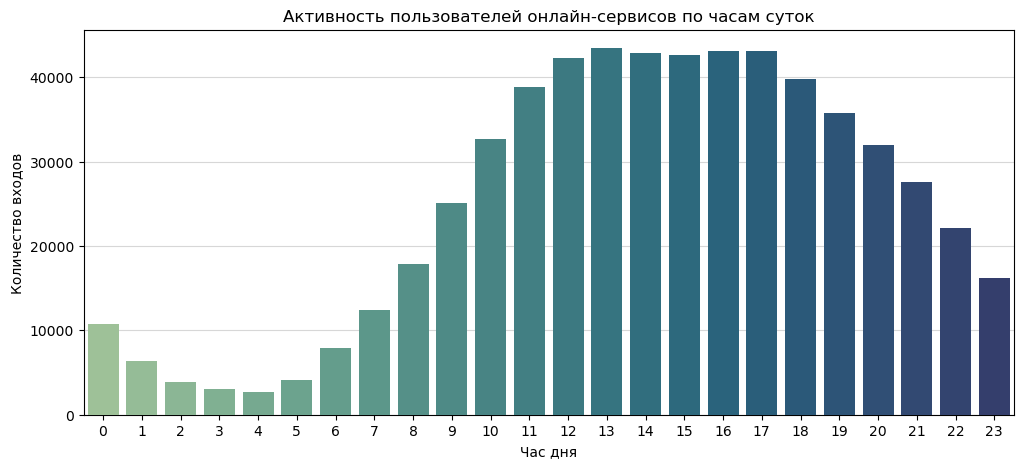

In [285]:
plt.figure(figsize=(12,5))
sns.countplot(data=entry, x='Час', palette= 'crest', zorder = 3)

plt.title('Активность пользователей онлайн-сервисов по часам суток')
plt.xlabel('Час дня')
plt.ylabel('Количество входов')
plt.grid(axis ='y', alpha=0.5, zorder = 0)
plt.show()

In [243]:
payments['День_недели'] = payments['Дата_перевода'].dt.day_name(locale='ru_RU')
payments['Час'] = payments['Дата_перевода'].dt.hour

In [245]:
payments.head()

,Сумма,Валюта_RUB,ID,Дата_обработки,Статус,Дата_перевода,ID_Клиента,Дата,Месяц,День_недели,Час
0,100.00,да,1,2025-01-01 14:32:24,DONE,2025-01-01 14:32:21,10928,2025-01-01,2025-01,Среда,14
1,200000.00,да,2,2025-01-01 13:18:01,DONE,2025-01-01 13:18:00,2338,2025-01-01,2025-01,Среда,13
2,260000.00,да,3,2025-01-01 08:09:14,DONE,2025-01-01 08:09:13,4051,2025-01-01,2025-01,Среда,8
3,1434.16,да,4,2025-01-01 09:16:07,DONE,2025-01-01 09:16:06,852,2025-01-01,2025-01,Среда,9
4,525.00,да,5,2025-01-01 09:16:57,DONE,2025-01-01 09:16:45,4078,2025-01-01,2025-01,Среда,9


C:\Users\User\AppData\Local\Temp\ipykernel_2892\394387223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=payments,


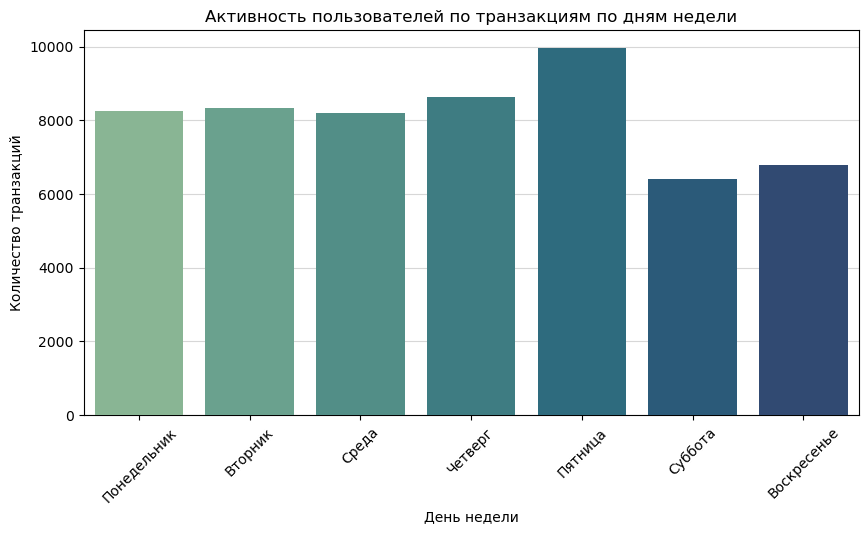

In [287]:
plt.figure(figsize = (10, 5))
sns.countplot(data=payments,
             x = 'День_недели',
             order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
             palette = 'crest', zorder = 3)

plt.title('Активность пользователей по транзакциям по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid(axis ='y', alpha=0.5, zorder = 0)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2892\2482216392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=payments, x='Час', palette= 'crest', zorder = 3)


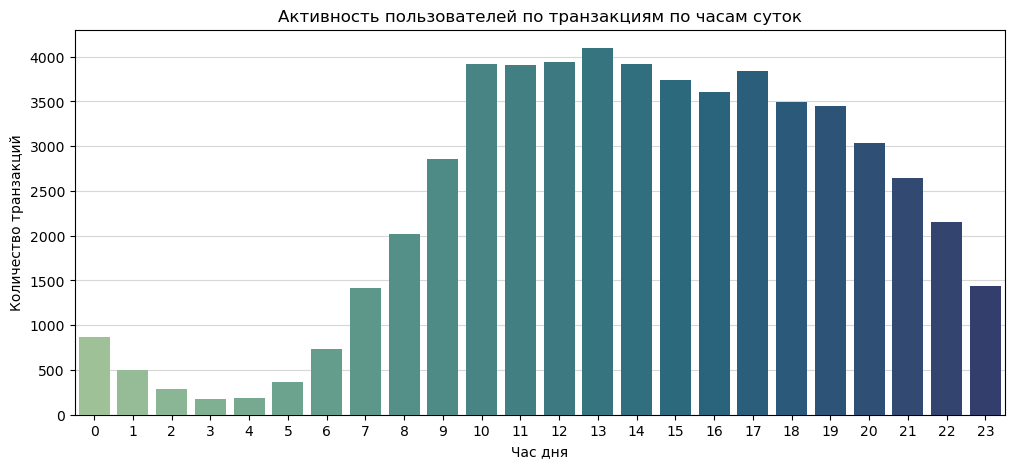

In [291]:
plt.figure(figsize=(12,5))
sns.countplot(data=payments, x='Час', palette= 'crest', zorder = 3)

plt.title('Активность пользователей по транзакциям по часам суток')
plt.xlabel('Час дня')
plt.ylabel('Количество транзакций')
plt.grid(axis ='y', alpha=0.5, zorder = 0)
plt.show()

Структура активности использования онлайн-сервисов и активности по транзакциям довольно схожа. Пик приходится на пятницу, а в выходные активность снижается. Если рассматривать по часам, то наибольшая активность наблюдается днем-вечером, в диапозоне примерно с 13 до 18.

3. Клиенты с какими продуктами чаще всего пользуются интернет-банком?

In [253]:
use_ib = entry[entry['ИБ'] == 1]['ID_Клиента'].unique()
len(use_ib)

808

In [255]:
dk_ib = dk[dk['ID_Клиента'].isin(use_ib)]
dk_ib.head()

,ID_Клиента,Дата,Активность,Продукт_Наименование,Продукт_Тип
150,288,2025-03-31,0,Текущий счет,Расчетный счет
151,288,2025-03-31,1,Накопительный счет,Накопительный счет
152,288,2025-01-31,0,Текущий счет,Расчетный счет
153,288,2024-12-31,1,Накопительный счет,Накопительный счет
154,288,2024-11-30,0,Текущий счет,Расчетный счет


In [257]:
top_types = dk_ib['Продукт_Наименование'].value_counts()
top_types

Продукт_Наименование
Текущий счет              3581
Зарплатный проект         1952
Карта Скоробей            1504
Накопительный счет        1135
Вклад                     1102
Платеж вендору            1068
Карта Шанс                 949
Кредитная карта            418
Карта Замочек              415
Карта Koшелек              401
Пенсионная карта           387
Текущий счет (пособия)     380
Ипотека                    349
Карта Космос               343
Удалая карта               188
Потребительский кредит     182
Детская карта              156
Бизнес карта               142
Карта Ключик                17
Карта Сим-Сим                5
Name: count, dtype: int64

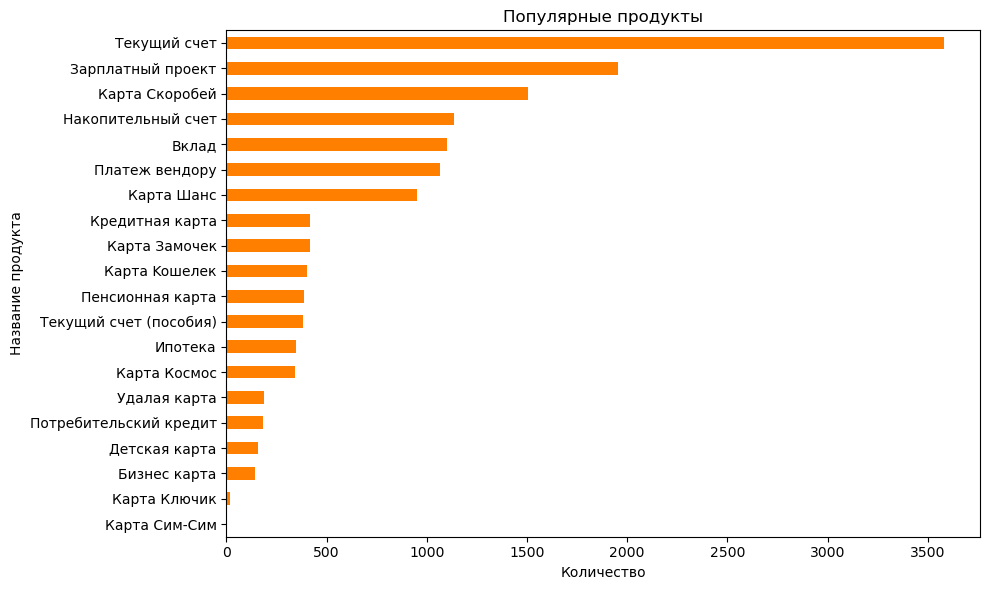

In [259]:
plt.figure(figsize=(10,6))
top_types.plot(kind = 'barh', color = colors[4])
plt.title('Популярные продукты')
plt.xlabel('Количество')
plt.ylabel('Название продукта')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

Чаще всего интернет-банком пользуются клиенты с продуктами "Текущий счет", "Зарплатный проект" и "Карта Скоробей", что объясняется их ежедневным использованием для платежей и переводов.

## Часть 3

***Задание:***
*Проведите сегментацию клиентов банка на основе их финансового поведения, дохода и демографических характеристик. Сформируйте выводы и гипотезы.*

1. Разделите клиентов на сегменты (например, молодые клиенты с высоким доходом, пенсионеры с низкими расходами).

Для дальнейший сегментации было решено исключить клиентов, у которых отстутсвует доход, а такаже клиентов младше 18 лет, так как они не до конца отражают реальную финансовую активность.

In [268]:
segment = df[(df['Клиенты_Доход'] != 0) & (df['Клиенты_Возраст'] > 18)].copy()
segment

,ID_Клиента,Клиенты_Возраст,Клиенты_Доход,Клиенты_Номер,Клиенты_Пол,Клиенты_Регион
278,279,23.0,2356.0,13.0,М,Санкт-Петербург
286,287,32.0,10101.0,21.0,Ж,Калининград
291,292,39.0,20312.0,26.0,М,Санкт-Петербург
323,324,37.0,16208.0,58.0,М,Санкт-Петербург
330,331,27.0,8900.0,64.0,Ж,Санкт-Петербург
...,...,...,...,...,...,...
64666,64667,59.0,8602.0,64066.0,М,Санкт-Петербург
64673,64674,54.0,4400.0,64073.0,Ж,Санкт-Петербург
64679,64680,43.0,5551.0,64079.0,М,Санкт-Петербург
64683,64684,21.0,2512.0,64083.0,М,Санкт-Петербург


In [270]:
median_income = segment['Клиенты_Доход'].median()
median_income

14797.0

In [272]:
median_age = segment['Клиенты_Возраст'].median()
median_age

38.0

Было решено делать сегментацию по двум ключевым признакам - возраст и доход, что привело к формированию 4 основных групп. Деление возраста и дохода осщуствлялось по медианным значениям, чтобы получить сбалансированные сегменты.

In [275]:
def segmentation(seg):
    if seg['Клиенты_Возраст'] < median_age and seg['Клиенты_Доход'] < median_income:
        return 'Молодые x Низкий доход'
    elif seg['Клиенты_Возраст'] < median_age and seg['Клиенты_Доход'] > median_income:
        return 'Молодые x Высокий доход'
    elif seg['Клиенты_Возраст'] > median_age and seg['Клиенты_Доход'] < median_income:
        return 'Зрелые x Низкий доход'
    else:
        return 'Зрелые x Высокий доход'

segment['Сегменты'] = segment.apply(segmentation, axis = 1)

In [277]:
segment['Сегменты'].value_counts()

Сегменты
Зрелые x Высокий доход     2524
Молодые x Низкий доход     2380
Зрелые x Низкий доход      1455
Молодые x Высокий доход    1428
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_2892\404916543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=segment, x = 'Сегменты', palette = 'crest', zorder = 3)


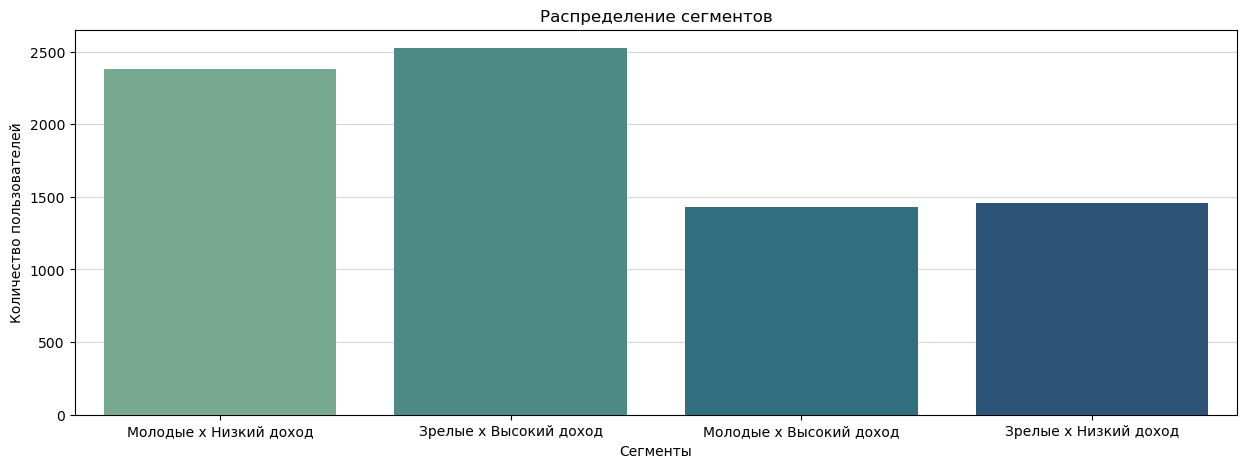

In [293]:
plt.figure(figsize=(15,5))
sns.countplot(data=segment, x = 'Сегменты', palette = 'crest', zorder = 3)

plt.title('Распределение сегментов')
plt.ylabel('Количество пользователей')
plt.grid(axis ='y', alpha=0.5, zorder = 0)
plt.show()

Больше всего клиентов относится к сегментам “Молодые × Низкий доход” и “Зрелые × Высокий доход”, что соответствует типичным различиям доходов между возрастными группами.

2. Разработайте рекомендации по продуктам и услугам для каждого сегмента.

In [297]:
prod_seg = segment.merge(
    dk,
    on = 'ID_Клиента',
    how = 'inner'
)

In [299]:
prod_seg.head()

,ID_Клиента,Клиенты_Возраст,Клиенты_Доход,Клиенты_Номер,Клиенты_Пол,Клиенты_Регион,Сегменты,Дата,Активность,Продукт_Наименование,Продукт_Тип
0,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2025-03-31,1,Текущий счет,Расчетный счет
1,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2025-03-31,1,Зарплатный проект,Зарплатный проект
2,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2025-03-31,0,Карта Скоробей,Карта
3,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2024-12-31,0,Карта Скоробей,Карта
4,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2024-12-31,1,Зарплатный проект,Зарплатный проект


In [301]:
activity_stats = prod_seg.groupby(['Сегменты', 'Продукт_Тип'])['Активность'].sum().unstack(fill_value=0)
activity_stats

Продукт_Тип,Вклад,Зарплатный проект,Ипотека,Карта,Кредитные карты,Накопительный счет,Платежи вендорам,Потребительские кредиты,Расчетный счет
Сегменты,,,,,,,,,
Зрелые x Высокий доход,1049,11892,201,10892,2359,2131,5315,1255,12430
Зрелые x Низкий доход,429,6175,30,5239,1205,690,1998,372,7068
Молодые x Высокий доход,305,6576,125,4619,1144,871,2452,686,6978
Молодые x Низкий доход,202,9213,17,4506,500,874,1360,158,11175


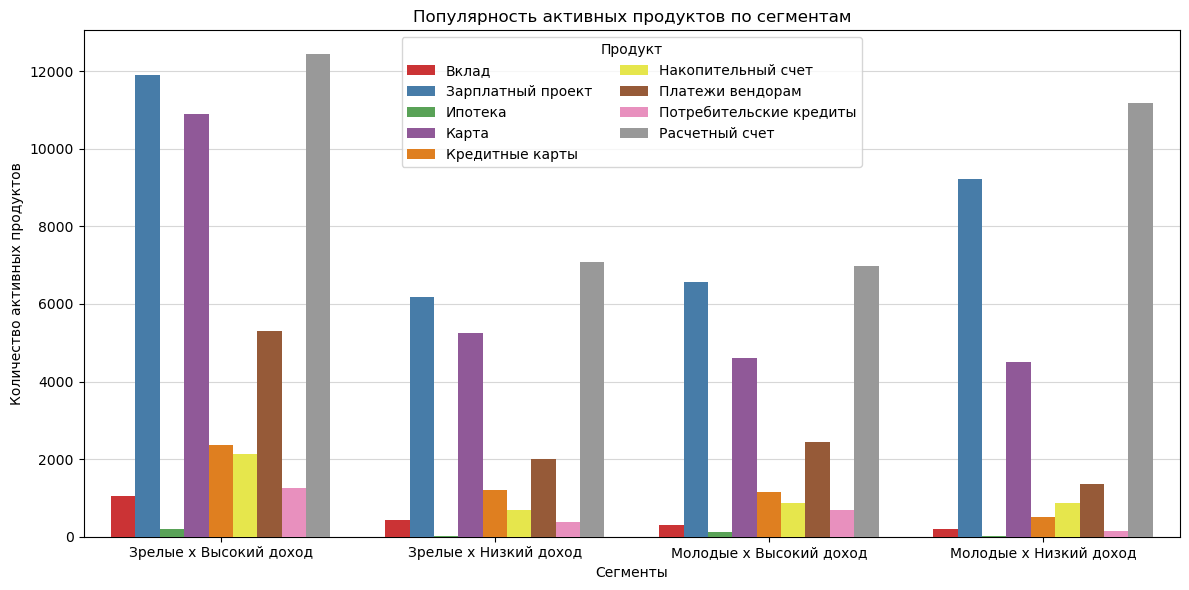

In [311]:
product_stats_plot = activity_stats.reset_index().melt(id_vars='Сегменты', var_name='Продукт_Тип', value_name='Количество')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=product_stats_plot,
    x='Сегменты',
    y='Количество',
    hue='Продукт_Тип', 
    palette = sns.color_palette('Set1'),
    zorder = 3
)

plt.title('Популярность активных продуктов по сегментам')
plt.ylabel('Количество активных продуктов')
plt.legend(title='Продукт', ncol=2)
plt.grid(axis = 'y', alpha = 0.5, zorder = 0)
plt.tight_layout()
plt.show()

Обобщенные рекомендации исходя из распределения активных продуктов по сегментам
1. Зрелые × Высокий доход
- Продвигать инвестиционные продукты, премиальные карты, депозитные программы с повышенной ставкой
- Развивать кредитные карты с привилегиями и увеличенными лимитами
2. Зрелые × Низкий доход
- Предлагать бюджетные банковские тарифы, карты с минимальными комиссиями
- Развивать программы лояльности и кэшбэк за покупки
3. Молодые × Высокий доход
- Акцентировать внимание на ипотечных продуктах и накопительных инструментах для крупных целей
- Продвигать премиальные карты с бонусами
4. Молодые × Низкий доход
- Продвигать дебетовые карты с кэшбэком и бесплатным обслуживанием
- Предлагать простые накопительные счета для формирования подушки безопасности

3. Сформулируйте не менее трех гипотез о финансовом поведении клиентов и рыночных условий, которые могли бы повлиять на стратегию банка (пример гипотезы: “Клиенты моложе 30 лет чаще используют мобильное приложение для перевода денег, чем старшее поколение.”)

*1. Молодые клиенты совершают больше входов в интернет-банк, чем зрелые.*

**H0** - Молодые и зрелые клиенты совершают одинаковое количество входов в интернет-банк.

**H1** - Молодые клиенты совершают больше входов в интернет-банк, чем зрелые.

In [321]:
hyp1 = entry.merge(df[['ID_Клиента', 'Клиенты_Возраст']],
                     on='ID_Клиента',
                     how='inner')

In [323]:
hyp1.head()

,Дата_входа,ИБ,МП,ID_Клиента,USER_ID,Дата,Месяц,День_недели,Час,Клиенты_Возраст
0,2024-12-09 21:17:45,1,0,39652,1,2024-12-09,2024-12,Понедельник,21,68.0
1,2024-12-09 00:52:18,1,0,39652,1,2024-12-09,2024-12,Понедельник,0,68.0
2,2025-01-10 01:49:41,1,0,39652,1,2025-01-10,2025-01,Пятница,1,68.0
3,2024-12-02 00:24:12,1,0,39652,1,2024-12-02,2024-12,Понедельник,0,68.0
4,2024-12-09 21:28:00,1,0,39652,1,2024-12-09,2024-12,Понедельник,21,68.0


In [335]:
ib = hyp1[hyp1['ИБ'] == 1]

In [337]:
young = ib[ib['Клиенты_Возраст'] < median_age]
old = ib[ib['Клиенты_Возраст'] >= median_age]

In [339]:
young_usage = young.groupby('ID_Клиента').size()
old_usage = old.groupby('ID_Клиента').size()

In [341]:
t_1, p_1 = stats.ttest_ind(young_usage, old_usage, equal_var=False)

print(f't-stat = {t_1}')
print(f'p_value = {p_1}')

t-stat = -1.4090278959642062
p_value = 0.15951728601920906


*p-value = 0.159 > 0.05*, поэтому у нас нет статистически значимых оснований утверждать, что молодые клиенты совершают больше входов в интернет-банк, чем зрелые.

*2. Клиенты с высоким доходом совершают переводы реже.*

**H0** - Клиенты с высоким и низким доходом совершают одинаковое количество переводов.

**H1** - Клиенты с высоким доходом совершают переводы реже.

In [353]:
hyp2 = payments.merge(df[['ID_Клиента', 'Клиенты_Доход']],
                         on='ID_Клиента',
                         how='inner')

In [355]:
hyp2.head()

,Сумма,Валюта_RUB,ID,Дата_обработки,Статус,Дата_перевода,ID_Клиента,Дата,Месяц,День_недели,Час,Клиенты_Доход
0,100.00,да,1,2025-01-01 14:32:24,DONE,2025-01-01 14:32:21,10928,2025-01-01,2025-01,Среда,14,20086.0
1,200000.00,да,2,2025-01-01 13:18:01,DONE,2025-01-01 13:18:00,2338,2025-01-01,2025-01,Среда,13,0.0
2,260000.00,да,3,2025-01-01 08:09:14,DONE,2025-01-01 08:09:13,4051,2025-01-01,2025-01,Среда,8,0.0
3,1434.16,да,4,2025-01-01 09:16:07,DONE,2025-01-01 09:16:06,852,2025-01-01,2025-01,Среда,9,0.0
4,525.00,да,5,2025-01-01 09:16:57,DONE,2025-01-01 09:16:45,4078,2025-01-01,2025-01,Среда,9,0.0


In [359]:
freq = hyp2.groupby('ID_Клиента').size().reset_index(name='Частота_транзакций')

In [363]:
fr = freq.merge(segment[['ID_Клиента', 'Клиенты_Доход']], on='ID_Клиента')

In [365]:
fr

,ID_Клиента,Частота_транзакций,Клиенты_Доход
0,279,6,2356.0
1,287,1,10101.0
2,292,2,20312.0
3,324,17,16208.0
4,331,1,8900.0
...,...,...,...
775,14095,1,3978.0
776,14100,1,3249.0
777,14149,1,1281.0
778,14184,1,53993.0


In [371]:
freq_high = fr[fr['Клиенты_Доход'] > median_income]['Частота_транзакций']
freq_low  = fr[fr['Клиенты_Доход'] <= median_income]['Частота_транзакций']

In [373]:
t_2, p_2 = stats.ttest_ind(freq_high, freq_low, equal_var=False)

print(f't-stat = {t_2}')
print(f'p_value = {p_2}')

t-stat = -0.8948302382115183
p_value = 0.3711770429225537


*p-value = 0.371 > 0.05*, мы не отвергаем нулевую гипотезу. Статистически значимой разницы в частоте переводов между клиентами с высоким и низким доходом не обнаружено.

*3. У мужчин активность по продуктам выше, чем у женщин.*

**H0** - Средняя активность по продуктам у мужчин и женщин не различается.

**H1** - У мужчин активность по продуктам выше, чем у женщин.

In [380]:
prod_seg.head()

,ID_Клиента,Клиенты_Возраст,Клиенты_Доход,Клиенты_Номер,Клиенты_Пол,Клиенты_Регион,Сегменты,Дата,Активность,Продукт_Наименование,Продукт_Тип
0,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2025-03-31,1,Текущий счет,Расчетный счет
1,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2025-03-31,1,Зарплатный проект,Зарплатный проект
2,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2025-03-31,0,Карта Скоробей,Карта
3,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2024-12-31,0,Карта Скоробей,Карта
4,279,23.0,2356.0,13.0,М,Санкт-Петербург,Молодые x Низкий доход,2024-12-31,1,Зарплатный проект,Зарплатный проект


In [382]:
prod_seg['Клиенты_Пол'].value_counts()

Клиенты_Пол
Ж    85523
М    66038
Name: count, dtype: int64

In [384]:
actv_client = df_merged.groupby('ID_Клиента')['Активность'].mean().reset_index(name='Средняя_активность')

In [386]:
hyp3 = actv_client.merge(
    df_merged[['ID_Клиента', 'Клиенты_Пол']].drop_duplicates(),
    on='ID_Клиента',
    how='inner'
)

In [388]:
hyp3

,ID_Клиента,Средняя_активность,Клиенты_Пол
0,268,1.000000,М
1,269,0.680000,М
2,271,0.800000,Ж
3,272,0.000000,М
4,273,0.733333,Ж
...,...,...,...
42744,64696,0.500000,М
42745,64697,0.000000,Ж
42746,64700,0.882353,Ж
42747,64701,0.812500,М


In [392]:
men = hyp3[hyp3['Клиенты_Пол'] == 'М']['Средняя_активность']
women = hyp3[hyp3['Клиенты_Пол'] == 'Ж']['Средняя_активность']

In [394]:
t_3, p_3 = stats.ttest_ind(men, women, equal_var=False)

print(f't-stat = {t_3}')
print(f'p_value = {p_3}')

t-stat = -31.890619235468996
p_value = 1.407136771012189e-220


*p-value < 0.05*, нулевая гипотеза отвергается. Различия в активности между мужчинами и женщинами статистически значимы, и можно утверждать, что мужчины в среднем демонстрируют более высокую активность.